## 1. Load the Data

In [4]:
# Importing the dependences
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [7]:

#Connecting the data file
customer_info = pd.read_csv("customer_info.csv")
product_info = pd.read_csv("product_info.csv")
sales_data = pd.read_csv("sales_data.csv")


In [9]:
customer_info.head()

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [10]:
product_info .head()

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


In [11]:
sales_data.head()

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-2025,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-2025,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,07-07-2025,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,08-07-2025,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,08-07-2025,DELAYED,Credit Card,West,0.20


In [12]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   497 non-null    object
 1   email         494 non-null    object
 2   signup_date   496 non-null    object
 3   gender        496 non-null    object
 4   region        497 non-null    object
 5   loyalty_tier  498 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB


In [13]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2999 non-null   object 
 1   customer_id       2998 non-null   object 
 2   product_id        2995 non-null   object 
 3   quantity          2997 non-null   object 
 4   unit_price        2999 non-null   float64
 5   order_date        2998 non-null   object 
 6   delivery_status   2997 non-null   object 
 7   payment_method    2997 non-null   object 
 8   region            3000 non-null   object 
 9   discount_applied  2483 non-null   float64
dtypes: float64(2), object(8)
memory usage: 234.5+ KB


In [14]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     30 non-null     object 
 1   product_name   30 non-null     object 
 2   category       30 non-null     object 
 3   launch_date    30 non-null     object 
 4   base_price     30 non-null     float64
 5   supplier_code  30 non-null     object 
dtypes: float64(1), object(5)
memory usage: 1.5+ KB


### The data inspection showing the datatype is not correct, so I need to fix it

In [15]:
customer_info.isna().sum()

customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64

In [20]:
product_info.isna().sum()

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

In [19]:
sales_data.isna().sum()

order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            2
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64

### there were few Null values in customer info and sales data, which needs to be cleaned.

## 2. Clean the Data

In [6]:
# Strip whitespace (only string columns)
for col in customer_info.select_dtypes(include="object").columns:
    customer_info[col] = customer_info[col].str.strip()

# Normalize text
customer_info['email'] = customer_info['email'].str.lower()
customer_info['gender'] = (
    customer_info['gender'].str.lower().replace({
        "m": "male", "f": "female"
    }).str.title()
)
customer_info['region'] = customer_info['region'].str.title().fillna("Unknown")
customer_info['loyalty_tier'] = (
    customer_info['loyalty_tier'].str.lower().replace({
        "gold": "Gold", "silver": "Silver", "bronze": "Bronze",
        "platinum": "Platinum", "diamond": "Diamond"
    }).str.title().fillna("Unknown")
)

# Convert date (safe parsing, no deprecated args)
customer_info['signup_date'] = pd.to_datetime(
    customer_info['signup_date'], errors='coerce', dayfirst=True
)

# Drop duplicate customers
customer_info = customer_info.drop_duplicates(subset=['customer_id'])

# ------------------------------
# 2. Clean PRODUCT INFO
# ------------------------------
for col in product_info.select_dtypes(include="object").columns:
    product_info[col] = product_info[col].str.strip()

product_info['product_name'] = product_info['product_name'].str.title()
product_info['category'] = product_info['category'].str.title().fillna("Unknown")
product_info['supplier_code'] = product_info['supplier_code'].str.upper()

product_info['launch_date'] = pd.to_datetime(
    product_info['launch_date'], errors='coerce', dayfirst=True
)

# Ensure numeric + non-negative
product_info['base_price'] = pd.to_numeric(product_info['base_price'], errors='coerce')
product_info = product_info[product_info['base_price'] >= 0]

# Drop duplicate products
product_info = product_info.drop_duplicates(subset=['product_id'])

# ------------------------------
# 3. Clean SALES DATA
# ------------------------------
for col in sales_data.select_dtypes(include="object").columns:
    sales_data[col] = sales_data[col].str.strip()

# Normalize categorical fields
sales_data['delivery_status'] = sales_data['delivery_status'].str.lower().replace({
    "delayed": "Delayed",
    "delivered": "Delivered",
    "cancelled": "Cancelled"
}).str.title()

sales_data['payment_method'] = sales_data['payment_method'].str.lower().replace({
    "credit card": "Credit Card",
    "paypal": "PayPal",
    "bank transfer": "Bank Transfer"
}).str.title().fillna("Unknown")

sales_data['region'] = sales_data['region'].str.title().fillna("Unknown")

# Convert date
sales_data['order_date'] = pd.to_datetime(
    sales_data['order_date'], errors='coerce', dayfirst=True
)

# Numeric fields
sales_data['quantity'] = pd.to_numeric(sales_data['quantity'], errors='coerce')
sales_data['unit_price'] = pd.to_numeric(sales_data['unit_price'], errors='coerce')
sales_data['discount_applied'] = pd.to_numeric(
    sales_data['discount_applied'], errors='coerce'
).fillna(0.0)

# Remove negative values
sales_data = sales_data[
    (sales_data['quantity'] >= 0) &
    (sales_data['unit_price'] >= 0) &
    (sales_data['discount_applied'] >= 0)
]

# Drop duplicate orders
sales_data = sales_data.drop_duplicates(subset=['order_id'])

# ------------------------------
# Final Check
# ------------------------------
print("Customer Info missing values:\n", customer_info.isnull().sum())
print("Product Info missing values:\n", product_info.isnull().sum())
print("Sales Data missing values:\n", sales_data.isnull().sum())


Customer Info missing values:
 customer_id     1
email           6
signup_date     4
gender          4
region          0
loyalty_tier    0
dtype: int64
Product Info missing values:
 product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64
Sales Data missing values:
 order_id            1
customer_id         2
product_id          5
quantity            0
unit_price          0
order_date          2
delivery_status     3
payment_method      0
region              0
discount_applied    0
dtype: int64


/var/folders/8r/mzpntfwj1k76ggst1jznjjf80000gn/T/ipykernel_1918/3462852876.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer_info['signup_date'] = pd.to_datetime(
/var/folders/8r/mzpntfwj1k76ggst1jznjjf80000gn/T/ipykernel_1918/3462852876.py:51: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product_info['launch_date'] = pd.to_datetime(


## 3. Merge the Data  

In [9]:
# ------------------------------
# 3. Merge the Data
# ------------------------------

# Step 1: Merge sales_data with product_info on product_id
merged_df = pd.merge(
    sales_data, 
    product_info, 
    on="product_id", 
    how="left"
)

# Step 2: Merge the result with customer_info on customer_id
merged_df = pd.merge(
    merged_df, 
    customer_info, 
    on="customer_id", 
    how="left"
)

# Step 3: Inspect the merged DataFrame
print(merged_df.info())   # summary of columns & nulls
print(merged_df.head())   # preview first 5 rows


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2991 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2987 non-null   object        
 3   quantity          2992 non-null   float64       
 4   unit_price        2992 non-null   float64       
 5   order_date        2990 non-null   datetime64[ns]
 6   delivery_status   2989 non-null   object        
 7   payment_method    2992 non-null   object        
 8   region_x          2992 non-null   object        
 9   discount_applied  2992 non-null   float64       
 10  product_name      2987 non-null   object        
 11  category          2987 non-null 

## 4. Feature Engineering

In [23]:
    merged_df  # noqa
except NameError:
    merged_df = (
        sales_data.merge(product_info, on="product_id", how="left")
                  .merge(customer_info, on="customer_id", how="left")
    )

required_cols = {
    "quantity", "unit_price", "discount_applied",
    "order_date", "launch_date", "delivery_status", "email"
}
missing = [c for c in required_cols if c not in merged_df.columns]
if missing:
    raise KeyError(f"Missing columns in merged_df: {missing}")

for c in ["quantity", "unit_price", "discount_applied"]:
    merged_df[c] = pd.to_numeric(merged_df[c], errors="coerce")

# Fill discount_applied NaNs with 0 for revenue math
merged_df["discount_applied"] = merged_df["discount_applied"].fillna(0.0)

# Dates (coerce mixed formats without warnings)
for c in ["order_date", "launch_date"]:
    if not np.issubdtype(merged_df[c].dtype, np.datetime64):
        merged_df[c] = pd.to_datetime(merged_df[c], errors="coerce", dayfirst=True)

# 1) revenue = quantity × unit_price × (1 - discount_applied)
merged_df["revenue"] = merged_df["quantity"] * merged_df["unit_price"] * (1 - merged_df["discount_applied"])

# 2) order_week = ISO week from order_date
#    (cast to Int64 so missing dates become <NA> instead of error)
merged_df["order_week"] = merged_df["order_date"].dt.isocalendar().week.astype("Int64")

# 3) price_band = Low (<£15), Medium (£15–30), High (>£30)
merged_df["price_band"] = np.select(
    [
        merged_df["unit_price"] < 15,
        merged_df["unit_price"].between(15, 30, inclusive="both"),
    ],
    ["Low", "Medium"],
    default="High",
)

# 4) days_to_order = Days between launch_date and order_date
merged_df["days_to_order"] = (merged_df["order_date"] - merged_df["launch_date"]).dt.days.astype("Int64")

# 5) email_domain = part after '@' in email
merged_df["email_domain"] = (
    merged_df["email"].astype("string").str.strip().str.lower().str.extract(r"@([^@\s]+)$", expand=False)
)

# 6) is_late = True if delivery_status is "Delayed"
#    (normalize spacing/case just in case)
merged_df["is_late"] = merged_df["delivery_status"].astype(str).str.strip().str.title().eq("Delayed")

print(merged_df[["revenue", "order_week", "price_band", "days_to_order", "email_domain", "is_late"]].head())


   revenue  order_week price_band  days_to_order       email_domain  is_late
0  117.750          27       High            275    mills-logan.com    False
1   94.600          27     Medium            169         morgan.com     True
2   25.228          28     Medium            104  walters-smith.com    False
3   26.208          28       High            358          gmail.com    False
4   38.096          28       High            138        hotmail.com     True


## 5. Create Summary Tables

In [25]:
# --- Check what columns we have ---
print("Columns in merged_df:", merged_df.columns.tolist())

# ---------------------------------------------
# 1) Weekly revenue trends by region
# ---------------------------------------------
if "region" in merged_df.columns:
    weekly_revenue_region = (
        merged_df.groupby(["order_week", "region"])
        .agg(total_revenue=("revenue", "sum"))
        .reset_index()
        .sort_values(["order_week", "region"])
    )
else:
    weekly_revenue_region = (
        merged_df.groupby(["order_week"])
        .agg(total_revenue=("revenue", "sum"))
        .reset_index()
        .sort_values("order_week")
    )

# ---------------------------------------------
# 2) Product category performance
# ---------------------------------------------
if "category" in merged_df.columns:
    category_perf = (
        merged_df.groupby("category")
        .agg(
            total_revenue=("revenue", "sum"),
            total_quantity=("quantity", "sum"),
            avg_discount=("discount_applied", "mean"),
        )
        .reset_index()
        .sort_values("total_revenue", ascending=False)
    )
else:
    category_perf = pd.DataFrame()

# ---------------------------------------------
# 3) Customer behaviour by loyalty_tier and signup_month
# ---------------------------------------------
if "signup_date" in merged_df.columns:
    merged_df["signup_month"] = merged_df["signup_date"].dt.to_period("M")

if {"loyalty_tier", "signup_month"}.issubset(merged_df.columns):
    customer_behaviour = (
        merged_df.groupby(["loyalty_tier", "signup_month"])
        .agg(
            total_revenue=("revenue", "sum"),
            num_orders=("order_id", "nunique"),
            num_customers=("customer_id", "nunique"),
        )
        .reset_index()
    )
else:
    customer_behaviour = pd.DataFrame()

# ---------------------------------------------
# 4) Delivery performance by region and price_band
# ---------------------------------------------
if {"region", "price_band"}.issubset(merged_df.columns):
    delivery_perf = (
        merged_df.groupby(["region", "price_band"])
        .agg(
            total_orders=("order_id", "nunique"),
            late_orders=("is_late", "sum"),
        )
        .reset_index()
    )
    delivery_perf["late_rate"] = delivery_perf["late_orders"] / delivery_perf["total_orders"]
else:
    delivery_perf = pd.DataFrame()

# ---------------------------------------------
# 5) Preferred payment methods by loyalty_tier
# ---------------------------------------------
if {"loyalty_tier", "payment_method"}.issubset(merged_df.columns):
    payment_pref = (
        merged_df.groupby(["loyalty_tier", "payment_method"])
        .agg(order_count=("order_id", "nunique"))
        .reset_index()
        .sort_values(["loyalty_tier", "order_count"], ascending=[True, False])
    )
else:
    payment_pref = pd.DataFrame()

# ---------------------------------------------
# Preview results
# ---------------------------------------------
print("\nWeekly Revenue by Region:\n", weekly_revenue_region.head())
print("\nCategory Performance:\n", category_perf.head())
print("\nCustomer Behaviour:\n", customer_behaviour.head())
print("\nDelivery Performance:\n", delivery_perf.head())
print("\nPayment Preferences:\n", payment_pref.head())


Columns in merged_df: ['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price', 'order_date', 'delivery_status', 'payment_method', 'region_x', 'discount_applied', 'product_name', 'category', 'launch_date', 'base_price', 'supplier_code', 'email', 'signup_date', 'gender', 'region_y', 'loyalty_tier', 'revenue', 'order_week', 'price_band', 'days_to_order', 'email_domain', 'is_late']

Weekly Revenue by Region:
    order_week  total_revenue
0          14       387.9035
1          15       463.1515
2          16       738.8865
3          17       478.3305
4          18      4023.9490

Category Performance:
         category  total_revenue  total_quantity  avg_discount
0       Cleaning     93621.7840          3584.0      0.085566
4        Storage     46931.4575          1730.0      0.081043
2       Outdoors     40062.0680          1519.0      0.082016
1        Kitchen     33933.6760          1226.0      0.075622
3  Personal Care     24916.6365           902.0      0.086755

Customer 

## 6.Visual Exploration

In [28]:
# --- Ensure weekly revenue by region is available ---
if "region" in merged_df.columns:
    weekly_revenue_region = (
        merged_df.groupby(["order_week", "region"])
        .agg(total_revenue=("revenue", "sum"))
        .reset_index()
    )

    # --- Line plot ---
    plt.figure(figsize=(12,6))
    sns.lineplot(
        data=weekly_revenue_region,
        x="order_week",
        y="total_revenue",
        hue="region",
        marker="o"
    )

    plt.title("Weekly Revenue Trends by Region", fontsize=14)
    plt.xlabel("ISO Week", fontsize=12)
    plt.ylabel("Total Revenue (£)", fontsize=12)
    plt.legend(title="Region")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'region' not found in merged_df. Please check your merge.")


Column 'region' not found in merged_df. Please check your merge.


/var/folders/8r/mzpntfwj1k76ggst1jznjjf80000gn/T/ipykernel_1918/3469005983.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


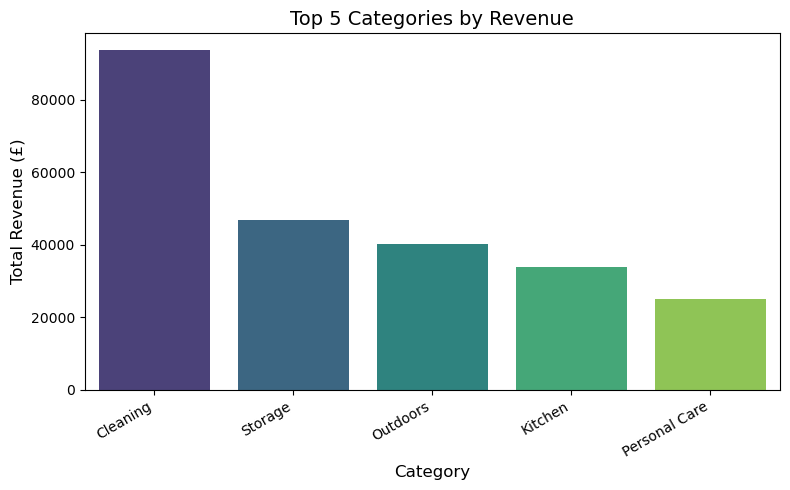

In [29]:
# --- Compute category performance if not already done ---
if {"category", "revenue"}.issubset(merged_df.columns):
    category_perf = (
        merged_df.groupby("category")
        .agg(total_revenue=("revenue", "sum"))
        .reset_index()
        .sort_values("total_revenue", ascending=False)
    )

    # Get top 5 categories
    top5_categories = category_perf.head(5)

    # --- Plot ---
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=top5_categories,
        x="category",
        y="total_revenue",
        palette="viridis"
    )

    plt.title("Top 5 Categories by Revenue", fontsize=14)
    plt.xlabel("Category", fontsize=12)
    plt.ylabel("Total Revenue (£)", fontsize=12)
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()
else:
    print("Missing 'category' or 'revenue' column in merged_df")


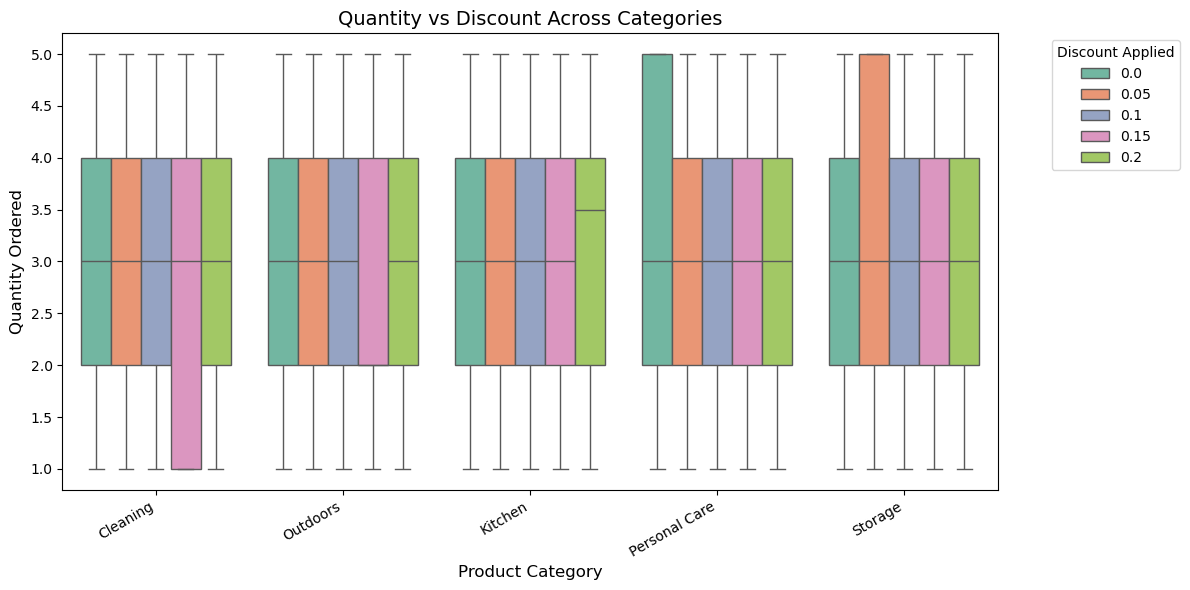

In [30]:
# --- Ensure required columns exist ---
if {"category", "quantity", "discount_applied"}.issubset(merged_df.columns):
    plt.figure(figsize=(12,6))
    sns.boxplot(
        data=merged_df,
        x="category",
        y="quantity",
        hue="discount_applied",
        palette="Set2"
    )

    plt.title("Quantity vs Discount Across Categories", fontsize=14)
    plt.xlabel("Product Category", fontsize=12)
    plt.ylabel("Quantity Ordered", fontsize=12)
    plt.xticks(rotation=30, ha="right")
    plt.legend(title="Discount Applied", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("Missing one of: category, quantity, discount_applied in merged_df")


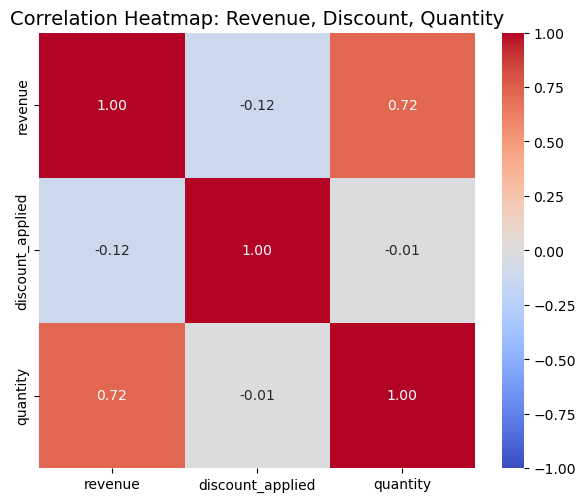

In [31]:
# --- Select numeric columns of interest ---
cols = ["revenue", "discount_applied", "quantity"]

# Keep only the ones that exist in merged_df
available = [c for c in cols if c in merged_df.columns]

if available:
    corr_matrix = merged_df[available].corr()

    # --- Plot heatmap ---
    plt.figure(figsize=(6,5))
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap="coolwarm",
        vmin=-1, vmax=1,
        square=True,
        fmt=".2f"
    )
    plt.title("Correlation Heatmap: Revenue, Discount, Quantity", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print(f"None of {cols} found in merged_df.columns")


In [34]:
# --- Ensure required columns exist ---
if {"loyalty_tier", "region"}.issubset(merged_df.columns):
    plt.figure(figsize=(10,6))
    sns.countplot(
        data=merged_df,
        x="loyalty_tier",
        hue="region",
        palette="Set2"
    )

    plt.title("Orders by Loyalty Tier (split by Region)", fontsize=14)
    plt.xlabel("Loyalty Tier", fontsize=12)
    plt.ylabel("Number of Orders", fontsize=12)
    plt.xticks(rotation=30, ha="right")
    plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("Missing 'loyalty_tier' or 'region' in merged_df")


Missing 'loyalty_tier' or 'region' in merged_df


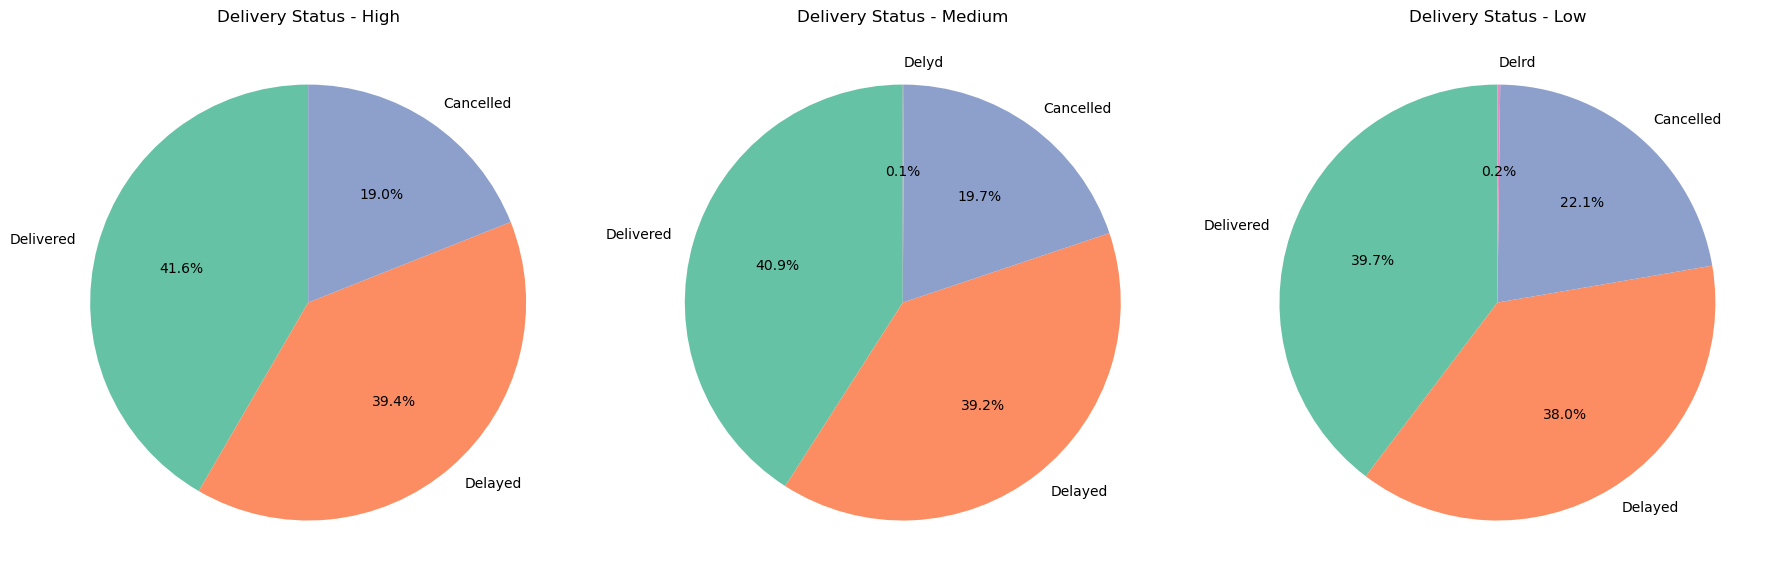

In [33]:
# Pie chart for each price band
if {"delivery_status", "price_band"}.issubset(merged_df.columns):
    price_bands = merged_df["price_band"].unique()
    fig, axes = plt.subplots(1, len(price_bands), figsize=(6*len(price_bands),6))

    if len(price_bands) == 1:
        axes = [axes]  # ensure iterable if only 1 band

    for ax, band in zip(axes, price_bands):
        subset = merged_df[merged_df["price_band"] == band]["delivery_status"].value_counts()
        ax.pie(
            subset,
            labels=subset.index,
            autopct="%1.1f%%",
            colors=sns.color_palette("Set2"),
            startangle=90
        )
        ax.set_title(f"Delivery Status - {band}")

    plt.tight_layout()
    plt.show()
